In [1]:
!pip install pandas
!pip install scikit-learn
!pip install xgboost
!pip install matplotlib

### Setup 
Import required processing library 

In [2]:
import pandas as pd
print(pd.__version__)
import numpy as np
print(np.__version__)
import xgboost as xg
print(xg.__version__)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

2.0.2
1.23.5
1.7.6


In [3]:
# check xgboost version
data_path = "..\Data\Final_Well_Block_Data.csv"
df = pd.read_csv(data_path)
print("\nLoaded Data :", data_path, "\n----------------------------------------------")
print("\n","\n",df.head())


Loaded Data : ..\Data\Final_Well_Block_Data.csv 
----------------------------------------------

 
    Well   Distance (m) TVD       mTVDSS     Northing      Easting  \
0    105       2574.303891  2508.343891  839185.6252  2516792.901   
1    105       2579.342020  2513.382020  839185.5960  2516792.920   
2    105       2584.657566  2518.697566  839185.5651  2516792.940   
3    105       2589.983529  2524.023529  839185.5343  2516792.961   
4    105       2595.320506  2529.360506  839185.5033  2516792.981   

   ANGLE_FAIL.DEG                  :  Fail Angle  \
0                                         28.794   
1                                         29.194   
2                                         33.519   
3                                         33.092   
4                                         31.582   

   BRIT_IND.                     :  Brittleness Index  \
0                                             23.759    
1                                             30.047    


### Checking data distribution

In [462]:
## plotting the bar graph of data
# df.plot(kind = 'bar')

### Normalization

In [4]:
df_max_scaled = df.copy()
i = 0  
# apply normalization techniques
for column in df_max_scaled.iloc[:,1:-1].columns:
        df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
## view normalized data
display(df_max_scaled)

,Well,Distance (m) TVD,mTVDSS,Northing,Easting,ANGLE_FAIL.DEG : Fail Angle,BRIT_IND. : Brittleness Index,BRIT_PR. : Brittleness Index from Poisson's Ratio,BRIT_YM. : Brittleness Index from Young's Modulus,BRIT_AVG,...,SHMIN_GRAD. : Horizontal Stress Gradient (Min),STRESS_CUM.PSI : Cumulative stress (SHPZ),UCS_BF.PSI : Uniaxial Compressive Strength (BF),UCS_LAL.PSI : Uniaxial Compressive Strength (lal),VP .FT/S : Compressional velocity,VPVS . : Vp / Vs ratio,VS .FT/S : Shear velocity,YM . : Youngs' Modulus,YM_STAT. : Youngs' Modulus (Static),Well Block Pressure (psi)
0,105,0.737075,0.732013,0.999582,0.999999,0.617261,0.224038,0.328552,0.095898,0.224038,...,0.916316,0.652569,0.151878,0.348680,0.451574,0.802296,0.443658,0.168349,0.105871,1598.089844
1,105,0.738517,0.733484,0.999582,0.999999,0.625836,0.283331,0.427920,0.113953,0.283331,...,0.889474,0.581342,0.163082,0.357300,0.458832,0.764031,0.473206,0.184936,0.117613,1598.709595
2,105,0.740039,0.735035,0.999582,0.999999,0.718552,0.296599,0.322279,0.193441,0.296599,...,0.917368,0.674205,0.215189,0.462732,0.547608,0.804847,0.536198,0.258093,0.172603,1593.862061
3,105,0.741564,0.736589,0.999582,0.999999,0.709398,0.316373,0.364878,0.193887,0.316376,...,0.905263,0.628208,0.215493,0.451239,0.537931,0.786990,0.538509,0.258494,0.172896,1596.238892
4,105,0.743092,0.738147,0.999582,0.999999,0.677028,0.194797,0.209795,0.128148,0.194797,...,0.949474,0.729518,0.172055,0.412610,0.505404,0.861820,0.462215,0.197997,0.127104,1597.651489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,107,0.960158,0.959391,1.000000,0.999783,0.851955,0.682996,0.624901,0.514616,0.682996,...,0.756842,0.834307,0.471842,0.665166,0.718062,0.708333,0.798697,0.553526,0.443151,5326.854004
479,107,0.960353,0.959590,1.000000,0.999783,0.855235,0.712133,0.651647,0.536519,0.712133,...,0.748947,0.830915,0.492035,0.671083,0.723045,0.702381,0.811239,0.573638,0.464481,5327.181152
480,107,0.960546,0.959787,1.000000,0.999783,0.884025,0.638639,0.462366,0.553153,0.638642,...,0.806842,0.895653,0.507602,0.725746,0.769072,0.752551,0.805117,0.588942,0.480920,5327.507324
481,107,0.960739,0.959983,1.000000,0.999783,0.901239,0.628087,0.410527,0.570092,0.628090,...,0.824211,0.884844,0.523659,0.760664,0.798473,0.770408,0.817014,0.604567,0.497847,5327.831543


In [465]:
## plotting after normalization
# df_max_scaled.plot(kind = 'bar')

### Splitting
##### X,y splitting and then further dividing testing and training dataset

In [5]:
X, y = df_max_scaled.iloc[lambda x: x.index % 10 == 0, :-1], df_max_scaled.iloc[lambda x: x.index % 10 == 0, -1]
print("\n", X.head(), "\n", y.head())


     Well   Distance (m) TVD    mTVDSS  Northing   Easting  \
0     105          0.737075  0.732013  0.999582  0.999999   
10    105          0.749025  0.744194  0.999582  0.999999   
20    105          0.754438  0.749712  0.999582  1.000000   
30    105          0.768826  0.764376  0.999582  1.000000   
40    105          0.780693  0.776471  0.999582  1.000000   

    ANGLE_FAIL.DEG                  :  Fail Angle  \
0                                        0.617261   
10                                       0.744941   
20                                       0.664444   
30                                       0.724726   
40                                       0.579232   

    BRIT_IND.                     :  Brittleness Index  \
0                                            0.224038    
10                                           0.427802    
20                                           0.155117    
30                                           0.393073    
40                    

In [6]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)
print("\n", train_X.head(), "\n", test_X.head(), "\n\n\n", train_y.head(), "\n", test_y.head())



      Well   Distance (m) TVD    mTVDSS  Northing   Easting  \
10     105          0.749025  0.744194  0.999582  0.999999   
60     105          0.820768  0.817318  0.999582  1.000000   
270    106          0.889228  0.887096  0.999634  0.999781   
440    107          0.925326  0.923888  0.999981  0.999788   
240    106          0.864947  0.862347  0.999622  0.999786   

     ANGLE_FAIL.DEG                  :  Fail Angle  \
10                                        0.744941   
60                                        0.916695   
270                                       0.869855   
440                                       0.848332   
240                                       0.860444   

     BRIT_IND.                     :  Brittleness Index  \
10                                            0.427802    
60                                            0.728286    
270                                           0.558893    
440                                           0.537271    
240  

### Instantiation

In [7]:
# Train and test set are converted to DMatrix objects,
# as it is required by learning API.
train_dmatrix = xg.DMatrix(data = train_X, label = train_y)
test_dmatrix = xg.DMatrix(data = test_X, label = test_y)
# xgb_r = xg.XGBRegressor(objective ='reg:linear',
#                   n_estimators = 10, seed = 123)

In [24]:
# Parameter dictionary specifying base learner
param = {"eta":0.3,
         "booster":"gblinear", "objective":"reg:linear"}
epochs = 500
# params={"max_depth" : 4,
#          "eta":0.3,
#         'objective':'reg:squarederror'}
# cv_results = xg.cv(dtrain=train_dmatrix, params=params, nfold=3, metrics={'rmse'}, as_pandas=True, seed=20)
# print('RMSE: %.2f' % cv_results['test-rmse-mean'].min())  
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = epochs)
pred = xgb_r.predict(test_dmatrix)
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))
r2_score(test_y,pred)

[10:48:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  547.553189


0.6285602035590079

In [470]:
# accuracy_score(test_y, pred)
# import sklearn

RMSE :  547.553189

 R^2 Score: 0.628560


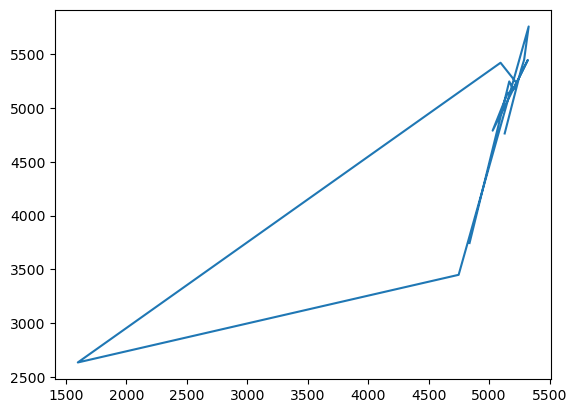

In [25]:
##Predictions
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))
r2_scor = r2_score(test_y,pred)
print("\n R^2 Score: %f" %(r2_scor))
# print("\n testing values: ", test_y, pred)
plt.plot(test_y,pred)
# print("predicted values: \n ", pred, "\n")


### Hyperparameter tuning

For hyperparameter tuning of different paramters to increase the accuracy.

In [418]:
# hyper_X, hyper_y = df.iloc[lambda x: x.index % 1000 == 0, :-1], df.iloc[lambda x: x.index % 1000 == 0, -1]

# hypertrain_X, hypertest_X, hypertrain_y, hypertest_y = train_test_split(hyper_X, hyper_y,
#                       test_size = 0.3, random_state = 123)

In [26]:
import xgboost as xgb
import sklearn
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.001,0.01,0.1,0.3,1], 'n_estimators': [10,100,1000,10000,100000]
}

# Create the XGBoost model object
xgb_model = xgb.XGBRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
print("done grid search")
# Fit the GridSearchCV object to the training data
grid_search.fit(train_X, train_y)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

done grid search
Fitting 5 folds for each of 25 candidates, totalling 125 fits


KeyboardInterrupt: 

### Feature importance calculation

In [11]:
xgb_r.get_score(importance_type='weight')

# plt.bar(range(len(feature_importance)), list(feature_importance.values()), align='center')
# plt.show()
# plt.xticks(range(len(feature_importance)), list(feature_importance.keys()))

{'Well ': 10.707292556762695,
 'Distance (m) TVD': -66.7306137084961,
 'mTVDSS': 733.8649291992188,
 'Northing': -504.3025207519531,
 'Easting': -868.396728515625,
 'ANGLE_FAIL.DEG                  :  Fail Angle': 1209.5433349609375,
 'BRIT_IND.                     :  Brittleness Index': 872.0726318359375,
 "BRIT_PR.                     :  Brittleness Index from Poisson's Ratio": -483.4471435546875,
 "BRIT_YM.                     :  Brittleness Index from Young's Modulus": 1214.1368408203125,
 'BRIT_AVG': 360.0243225097656,
 'CS   .M/MIN                 :  Compressive Strength': 1252.4237060546875,
 'DTCO .US/F                 :  Compressional slowness': -5370.7177734375,
 'DTSM .US/F                 :  Fast Shear Slowness': 3685.39404296875,
 'IP   .RAYL/M2                 :  P Impedence': 3350.72314453125,
 'IS   .RAYL/M2                 :  S Impedance': 3243.68603515625,
 'KBULK.                     :  Bulk Mudulus': -3277.873779296875,
 'LAMBDA.                     :  Lambda': -165

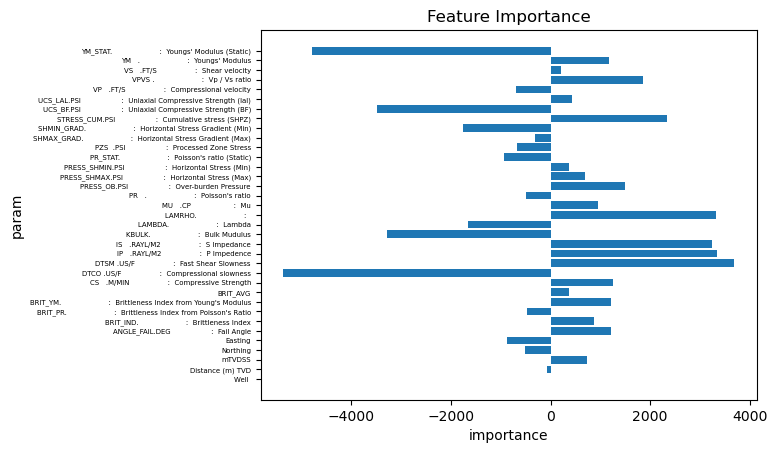

In [12]:
feature_importance = xgb_r.get_score(importance_type='weight')
y=list(feature_importance.keys())
 
# getting values against each value of y
x=list(feature_importance.values())
plt.barh(y, x)
# setting label of y-axis
plt.ylabel("param")
plt.yticks(fontsize = 5) 
# setting label of x-axis
plt.xlabel("importance")
plt.title("Feature Importance")
plt.show()


### After Feature Selection

In [13]:
# print(feature_importance.keys())
drop_col = []
thres = 200
j = -1
for val in feature_importance.values():
    j+=1
    if(abs(val)<thres):
        for i,v in enumerate(feature_importance):
            if i == 0 or i == 1 or i == 2 or i == 3:
                continue
            if i == j:
                drop_col.append(v)
                print(v)

In [14]:
# drop_col = []
df_drop_col_scaled = df_max_scaled.drop(drop_col,axis = 1)
# df.drop(['A'], axis=1)

### Repeating the process again

In [15]:
X, y = df_drop_col_scaled.iloc[lambda x: x.index % 10 == 0, 1:-1], df_drop_col_scaled.iloc[lambda x: x.index % 10 == 0, -1]
# print("\n", X.head(), "\n", y.head())
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)
print("\n", train_X.head(), "\n", test_X.head(), "\n\n\n", train_y.head(), "\n", test_y.head())



      Distance (m) TVD    mTVDSS  Northing   Easting  \
10           0.749025  0.744194  0.999582  0.999999   
60           0.820768  0.817318  0.999582  1.000000   
270          0.889228  0.887096  0.999634  0.999781   
440          0.925326  0.923888  0.999981  0.999788   
240          0.864947  0.862347  0.999622  0.999786   

     ANGLE_FAIL.DEG                  :  Fail Angle  \
10                                        0.744941   
60                                        0.916695   
270                                       0.869855   
440                                       0.848332   
240                                       0.860444   

     BRIT_IND.                     :  Brittleness Index  \
10                                            0.427802    
60                                            0.728286    
270                                           0.558893    
440                                           0.537271    
240                                           0

In [16]:
# Train and test set are converted to DMatrix objects,
# as it is required by learning API.
train_dmatrix = xg.DMatrix(data = train_X, label = train_y)
test_dmatrix = xg.DMatrix(data = test_X, label = test_y)
# xgb_r = xg.XGBRegressor(objective ='reg:linear',
#                   n_estimators = 10, seed = 123)

In [17]:
# Parameter dictionary specifying base learner
param = {"eta":0.03,
         "booster":"gblinear", "objective":"reg:linear"}
epochs = 5000
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = epochs)
pred = xgb_r.predict(test_dmatrix)
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))
r2_score(test_y,pred)

[10:44:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  551.488215


0.6232022685651044

RMSE :  551.488215

 R^2 Score: 0.623202


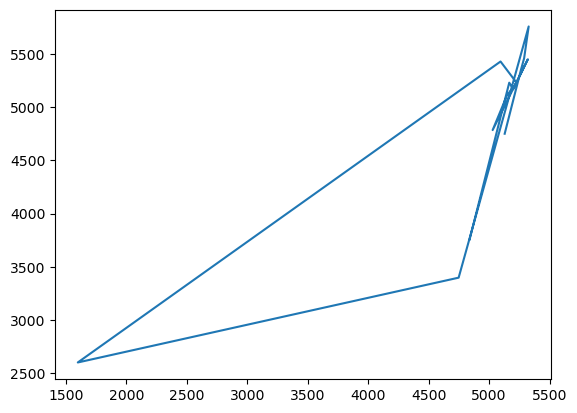

In [18]:
##Predictions
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))
r2_scor = r2_score(test_y,pred)
print("\n R^2 Score: %f" %(r2_scor))
plt.plot(test_y, pred)
# print("predicted values: \n ", pred, "\n")

### Visualizing the results

In [30]:
df_107 = df_drop_col_scaled.iloc[314:484]
# X_TVD_107 = df[:6000:100]['mTVDSS']
X_107, y_107 = df_107.iloc[:, 1:-1], df_107.iloc[:, -1]
test_dmatrix_107 = xg.DMatrix(data = X_107, label = y_107)
# X_TVD_107

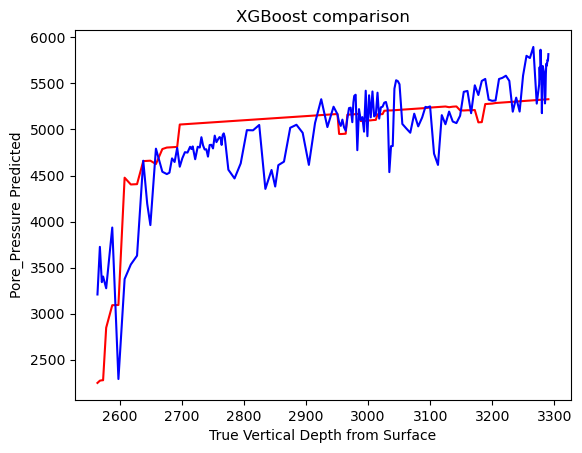

In [32]:
plt.plot(X_107['mTVDSS']*df['mTVDSS'].abs().max(),y_107, color = 'red')
plt.plot(X_107['mTVDSS']*df['mTVDSS'].abs().max(), xgb_r.predict(test_dmatrix_107), color = 'blue')
plt.title('XGBoost comparison')
plt.xlabel('True Vertical Depth from Surface')
plt.ylabel('Pore_Pressure Predicted')
plt.show()

### Hyperparam tuning again for new dataset

In [21]:
param_grid = {
    'learning_rate': [0.01,0.03,0.1,0.3], 'n_estimators': [1000,2000,5000,10000]
}

# Create the XGBoost model object
xgb_model = xgb.XGBRegressor(verbose=1)

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid,refit = True, cv=5, scoring='neg_mean_squared_error', verbose=1)
print("done grid search")
# Fit the GridSearchCV object to the training data
grid_search.fit(train_X, train_y)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

done grid search
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[10:44:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

[10:44:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

[10:44:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

[10:44:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

[10:44:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows

[10:46:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

[10:46:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

[10:46:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

[10:46:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

[10:46:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

[10:46:27] WARN

### Second Time Feature Selection

In [22]:
xgb_r.get_score(importance_type='weight')

{'Distance (m) TVD': 993.2327270507812,
 'mTVDSS': 989.9146118164062,
 'Northing': -29.158058166503906,
 'Easting': -31.339391708374023,
 'ANGLE_FAIL.DEG                  :  Fail Angle': 550.80224609375,
 'BRIT_IND.                     :  Brittleness Index': 117.8401107788086,
 "BRIT_PR.                     :  Brittleness Index from Poisson's Ratio": -348.24920654296875,
 "BRIT_YM.                     :  Brittleness Index from Young's Modulus": 321.3888244628906,
 'BRIT_AVG': 57.34185791015625,
 'CS   .M/MIN                 :  Compressive Strength': 548.4053344726562,
 'DTCO .US/F                 :  Compressional slowness': -1984.7891845703125,
 'DTSM .US/F                 :  Fast Shear Slowness': -1336.805908203125,
 'IP   .RAYL/M2                 :  P Impedence': 852.6458740234375,
 'IS   .RAYL/M2                 :  S Impedance': 856.8873291015625,
 'KBULK.                     :  Bulk Mudulus': -526.734619140625,
 'LAMBDA.                     :  Lambda': -519.633056640625,
 'LAMRHO. 

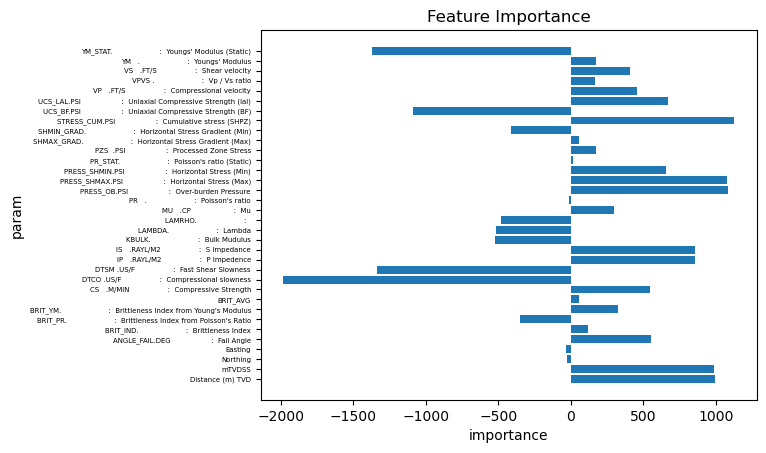

In [23]:
feature_importance = xgb_r.get_score(importance_type='weight')
y=list(feature_importance.keys())
 
# getting values against each value of y
x=list(feature_importance.values())
plt.barh(y, x)
# setting label of y-axis
plt.ylabel("param")
plt.yticks(fontsize = 5) 
# setting label of x-axis
plt.xlabel("importance")
plt.title("Feature Importance")
plt.show()